In [24]:
%%time
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns

#for plot with ATLAS styple
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import mplhep as hep
#hep.style.use(hep.style.ROOT) # For now ROOT defaults to CMS
# Or choose one of the experiment styles
hep.style.use(hep.style.ATLAS)
plt.style.use(hep.style.ATLAS)
#be able to read root files.
#and convert to numpy or pandas
import uproot
import gc

from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

from cells import cell_data 

MCdata="cell_analysis"
MC_root = f"/Users/abletimin/cernbox/Trigger/re21.9/{MCdata}/cells_cls.root"
#MC_root = f"../re21.9/{MCdata}/cells.root"
tree_name = "caloCells"
#Branch = "cell_e"
#Branches = ["cell_e", "cell_phi", "cell_eta", "metTruth_et", "metTruth_phi"]
with uproot.open(MC_root+":"+tree_name) as events:
    x_bin = np.linspace(-3.15, 3.15, num=33)
    y_bin = np.linspace(-5, 5, num=51)
    cell_imgs_Run4_ex, cell_Run4_label = cell_data(events, x_bin, y_bin, weight='cell_pt',
                                              label='cell_E',  unit='GeV',
                                                   eta='cell_eta', phi='cell_phi',
                                         statistic='sum', batch_size=1000)
    gc.collect()
 
    
file_from_edison="/Users/abletimin/cernbox/Trigger/ml-met-trigger/test.root"
with uproot.open(file_from_edison+":"+"ntuple") as events:
    cell_imgs_Run2_ex, cell_Run2_label = cell_data(events, x_bin, y_bin, weight='cell_et',
                                        label='metTruth_et', unit=None,
                                         statistic='sum', batch_size=1000)
    gc.collect()
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 1min 50s, sys: 13.4 s, total: 2min 4s
Wall time: 2min 26s


In [14]:
cell_imgs_Run4_ex.shape

(100, 50, 32)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x1468041c0>, cbar=<matplotlib.colorbar.Colorbar object at 0x146272f70>, text=[])

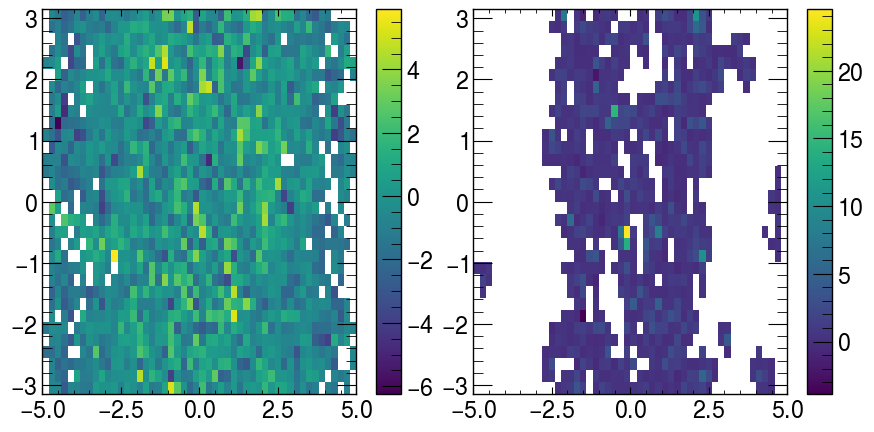

In [26]:
def get_img(data):
    data[data==0]=np.NaN
    return data

fig, axs = plt.subplots(1,2, figsize=(10,5))
ex_Run4 = get_img(cell_imgs_Run4_ex[15, :,:])
ex_Run2 = get_img(cell_imgs_Run2_ex[15, :,:])

hep.hist2dplot(ex_Run4, y_bin, x_bin, ax=axs[0])
hep.hist2dplot(ex_Run2, y_bin, x_bin, ax=axs[1])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x15a7d08b0>, cbar=<matplotlib.colorbar.Colorbar object at 0x159c986d0>, text=[])

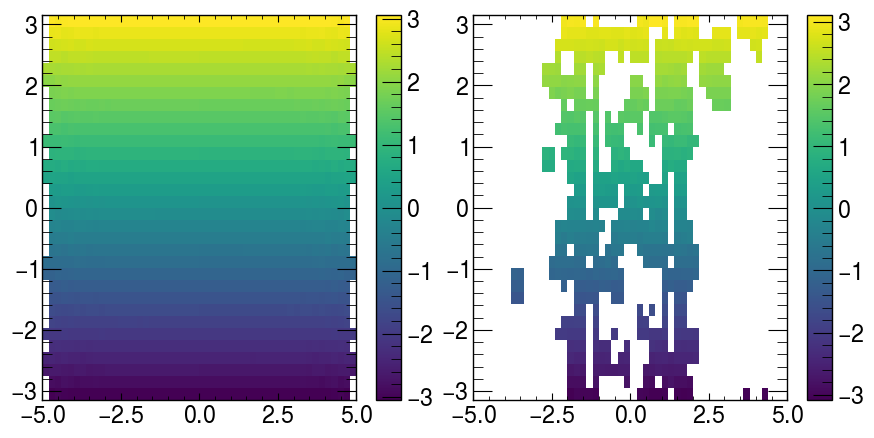

In [8]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
phi_Run4 = get_img(cell_imgs_Run4_phi[50, :,:])
phi_Run2 = get_img(cell_imgs_Run2_phi[50, :,:])

hep.hist2dplot(phi_Run4, y_bin, x_bin, ax=axs[0])
hep.hist2dplot(phi_Run2, y_bin, x_bin, ax=axs[1])

In [9]:
cell_imgs_Run4_ex[15, :,:]

array([[        nan,         nan, -0.24088937, ...,         nan,
                nan,         nan],
       [-0.53528278, -1.26587871, -1.3373541 , ..., -1.2464115 ,
        -1.97253315, -1.29000079],
       [-0.95371333, -1.55602747, -2.45327728, ..., -0.36441284,
        -1.91193396, -1.70751924],
       ...,
       [-1.06415224, -1.74364438, -1.27038956, ..., -0.77158687,
        -1.46006766, -0.87375556],
       [-0.61135142, -1.97120527, -0.4327788 , ..., -1.82620023,
        -0.80695898, -0.38087605],
       [        nan,         nan, -0.74324023, ...,         nan,
                nan,         nan]])